# Data Pre-processsing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
pd.set_option('display.max_columns', 500)

In [3]:
beneficiary_test = pd.read_csv("./data/Test_Beneficiarydata-1542969243754.csv")
inpatient_test = pd.read_csv("./data/Test_Inpatientdata-1542969243754.csv")
outpatient_test = pd.read_csv("./data/Test_Outpatientdata-1542969243754.csv")
test = pd.read_csv("./data/Test-1542969243754.csv")

beneficiary_train = pd.read_csv("./data/Train_Beneficiarydata-1542865627584.csv")
inpatient_train = pd.read_csv("./data/Train_Inpatientdata-1542865627584.csv")
outpatient_train = pd.read_csv("./data/Train_Outpatientdata-1542865627584.csv")
train = pd.read_csv("./data/Train-1542865627584.csv")

## Train set pre-processing

In [4]:
beneficiary_train.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [5]:
inpatient_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [6]:
outpatient_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [7]:
train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


### Obtain a single patient dataset

This is to form a single patient dataset, which can then be fed into the model

In [8]:
# compare the columns
inpatient_train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [9]:
outpatient_train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

Inpatient dataset has additional columns: AdmissionDT, DischargeDT, DiagnosisGroupCode

### Concat Inpatient and Outpatient datasets

In [10]:
# create binary columns to indicate Inpatient status (1)
inpatient_train['is_inpatient'] = 1
outpatient_train['is_inpatient'] = 0

In [11]:
print(f'inpatient dataset shape: {inpatient_train.shape}')
print(f'outpatient dataset shape: {outpatient_train.shape}')

inpatient dataset shape: (40474, 31)
outpatient dataset shape: (517737, 28)


In [12]:
# concat inpatient and outpatient datasets to form a single patient column
patient_train = pd.concat([inpatient_train, outpatient_train])

# observe the 3 missing columns in outpatient portion of the data not originally present
patient_train[patient_train['is_inpatient']==0].head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,is_inpatient
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,NaN,56409,0.0,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,NaN,79380,0.0,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,NaN,NaN,0.0,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,NaN,71947,0.0,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
print(f'patient dataset shape: {patient_train.shape}')

patient dataset shape: (558211, 31)


### Merge patient dataset with beneficiaries -- perform left join

In [14]:
beneficiary_train.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [15]:
beneficiary_train.shape

(138556, 25)

In [16]:
# both patient and beneficiary_train contains BeneID, perform left join
patient_train = pd.merge(patient_train, beneficiary_train, how='left', on='BeneID')

In [17]:
# expected number of columns = 25 + 31 - 1 (drop one of the duplicate BeneID column)
print(f'patient dataset shape: {patient_train.shape}')

patient dataset shape: (558211, 55)


### Merge provider wtih patient data

In [18]:
train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [19]:
'PotentialFraud' in patient_train.columns.to_list()

False

In [20]:
patient_train = pd.merge(patient_train, train, how='left', on='Provider')

### Understanding the dataset

In [21]:
patient_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,is_inpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,No


In [22]:
patient_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

In [23]:
patient_train.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,is_inpatient,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,558211.000000,557312.000000,23310.000000,5490.000000,969.000000,118.000000,9.000000,0.0,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,78.421085,5896.154612,4106.358106,4221.123839,4070.262712,5269.444444,NaN,0.072507,1.578838,1.255011,25.446969,378.588195,11.931472,11.93877,1.598132,1.409573,1.587998,1.848615,1.687070,1.565193,1.294605,1.240735,1.682353,1.688829,1.898280,5227.971466,568.756807,2278.225348,649.698745
std,3821.534891,274.016812,3050.489933,2031.640878,2281.849885,2037.626990,2780.071632,NaN,0.259325,0.493746,0.717437,15.192784,265.215531,0.889712,0.78590,0.490276,0.491755,0.492196,0.358424,0.463687,0.495732,0.455866,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811
min,0.000000,0.000000,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,40.000000,0.000000,3848.000000,2724.000000,2724.000000,2754.250000,4139.000000,NaN,0.000000,1.000000,1.000000,11.000000,150.000000,12.000000,12.00000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,460.000000,120.000000
50%,80.000000,0.000000,5363.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,0.000000,2.000000,1.000000,24.000000,350.000000,12.000000,12.00000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1170.000000,340.000000
75%,300.000000,0.000000,8669.000000,4439.000000,5185.000000,4439.000000,5185.000000,NaN,0.000000,2.000000,1.000000,38.000000,570.000000,12.000000,12.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,6000.000000,1068.000000,2590.000000,790.000000
max,125000.000000,1068.000000,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,1.000000,2.000000,5.000000,54.000000,999.000000,12.000000,12.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [24]:
# check for  variance
patient_train.select_dtypes(include=['number']).var()

InscClaimAmtReimbursed             1.460413e+07
DeductibleAmtPaid                  7.508521e+04
ClmProcedureCode_1                 9.305489e+06
ClmProcedureCode_2                 4.127565e+06
ClmProcedureCode_3                 5.206839e+06
ClmProcedureCode_4                 4.151924e+06
ClmProcedureCode_5                 7.728798e+06
ClmProcedureCode_6                          NaN
is_inpatient                       6.724954e-02
Gender                             2.437849e-01
Race                               5.147152e-01
State                              2.308207e+02
County                             7.033928e+04
NoOfMonths_PartACov                7.915867e-01
NoOfMonths_PartBCov                6.176389e-01
ChronicCond_Alzheimer              2.403705e-01
ChronicCond_Heartfailure           2.418233e-01
ChronicCond_KidneyDisease          2.422568e-01
ChronicCond_Cancer                 1.284681e-01
ChronicCond_ObstrPulmonary         2.150052e-01
ChronicCond_Depression             2.457

#### Handling Missing Values

In [25]:
patient_train.isna().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [26]:
# drop ClmProcedureCode_6 column, which is completely missing
patient_train.drop(['ClmProcedureCode_6'], axis=1, inplace=True)

To observe distribution of missing values in relation to other (numerical) features, then replace NaN with "NA"

In [27]:
# temporirily create a column to replace 'AttendingPhysician' missing values with 0, and present values with 1
patient_train['AttendingPhysician_temp'] = patient_train['AttendingPhysician'].apply(lambda x: 0 if pd.isnull(x) else 1)

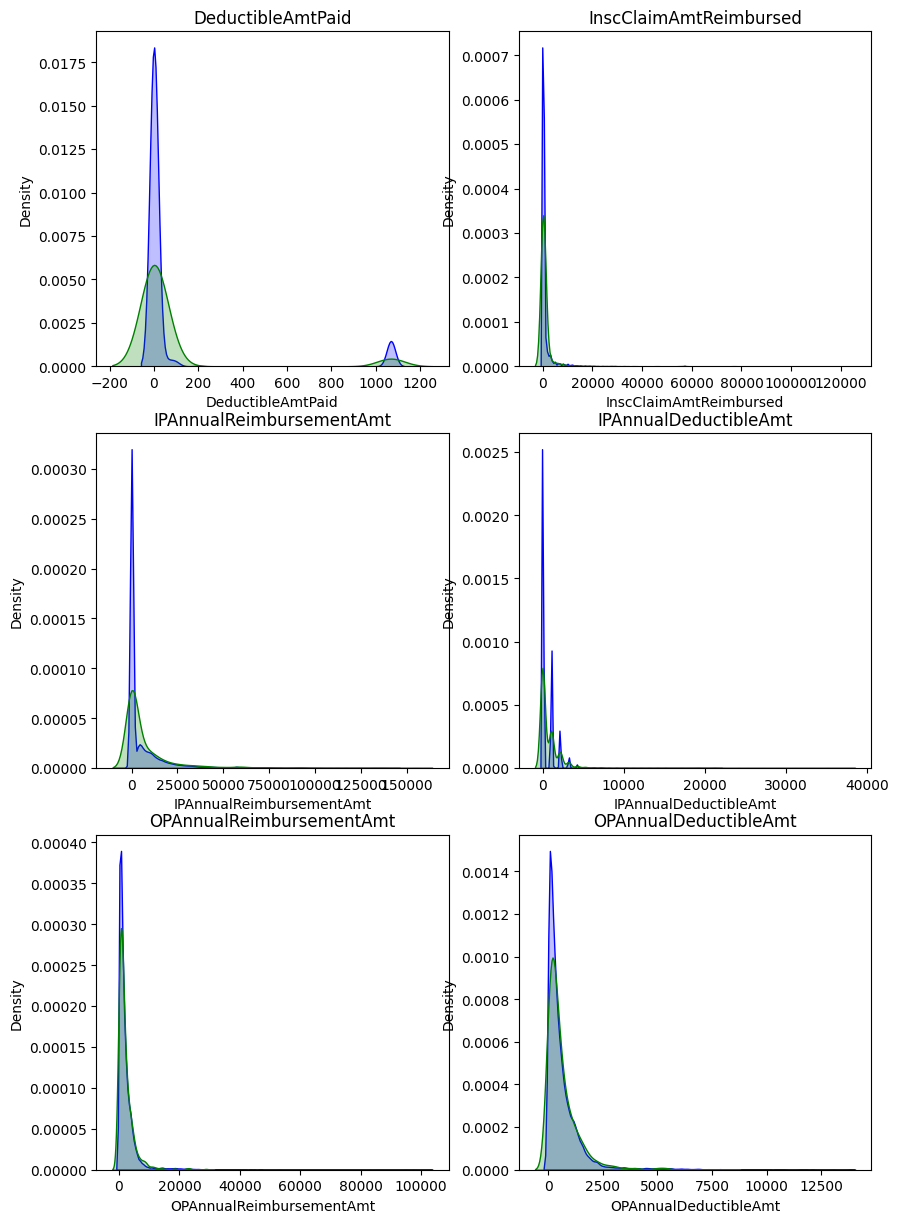

In [28]:
# select numerical columns to compare distribution against based on self-logic
selected_col =  ['DeductibleAmtPaid', 'InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
            'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

num_rows = (len(selected_col) + 3) // 2  # Adjust based on the desired layout
num_cols = 2

plt.figure(figsize=(10, 5*num_rows))
for idx, column in enumerate(selected_col, start=1):
    plt.subplot(num_rows, num_cols, idx)
    sns.kdeplot(patient_train[patient_train["AttendingPhysician_temp"]==1][column], fill=True, color="blue", label="like")
    sns.kdeplot(patient_train[patient_train["AttendingPhysician_temp"]==0][column], fill=True, color="green", label="dislike")
    plt.title(column)

plt.show()

From the graphs above, observe a somewhat similar distribution between attending physicians (between missing and present) and the selected numerical columns that could be related to fraud. Hence attending physicians may be Missing Completely At Random, and hence can be imputed with placeholder "NA"

In [29]:
# check distribution of missing attending physicians against in/outpatient
patient_train[patient_train['AttendingPhysician_temp']==0].groupby('is_inpatient').count()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,AttendingPhysician_temp
is_inpatient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1396,1396,1396,1396,1396,1396,0,8,12,0,706,1396,0,0,1359,818,507,316,171,104,68,48,28,0,0,0,0,0,0,1396,13,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396
1,112,112,112,112,112,112,0,6,1,112,112,103,112,112,112,112,110,109,103,96,90,80,59,1,54,10,1,0,0,112,2,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112


missing attending physicians belong to both in and outpatients, hence not missing at random

In [30]:
# drop the temp column
patient_train.drop(['AttendingPhysician_temp'], axis=1, inplace=True)

# check if any rows already have "NA" to prevent overridding
len(patient_train[patient_train['AttendingPhysician']=='NA'])

0

In [31]:
# replace missing attending physians with NA
patient_train['AttendingPhysician'] = patient_train['AttendingPhysician'].fillna('NA')

#### Missing values in Codes -- we suspect that only those with positive indication is filled in, else is left as blank, hence causing missing values

In [32]:
cat_codes = ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
         'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
         'ClmDiagnosisCode_10']
num_codes = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
         'ClmProcedureCode_5']

In [33]:
# examine nature of missing values in each of the columns
patient_train[patient_train['ClmDiagnosisCode_1'].isna()]['ClmDiagnosisCode_2'].unique()

array([nan], dtype=object)

Observe from the code chunk above that if diagnosis code is NAN at earlier numbers, it would be NAN for all future numbers because doctors probably fill multiple diagnosis in numerical order first

In [34]:
patient_train[patient_train['ClmDiagnosisCode_1'].isna()]['ClmAdmitDiagnosisCode'].nunique()

467

Observe from the code chunk above that while the number of missing ClmDiagnosisCode_1 = 10453, 467 reccords have diagnosis admisssion codes. Hence it can be assumed that codes are Missing Completely At Random (MACR) since they're not due to other variables (MAR) nor are they associated with the outcome variable.

In [35]:
patient_train.groupby('PotentialFraud').count()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,is_inpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
PotentialFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,345415,345415,345415,345415,345415,345415,345415,67497,125093,17072,83850,345024,17072,17072,338797,221276,145845,96216,63084,46042,34907,27336,20698,2317,9786,2244,406,42,3,345415,345415,2587,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415
Yes,212796,212796,212796,212796,212796,212796,212796,46950,74643,23402,62049,212288,23402,23402,208961,141329,97210,68320,48840,38350,31270,26108,21117,2693,13524,3246,563,76,6,212796,212796,1544,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796


In [36]:
patient_train[patient_train['ClmDiagnosisCode_1'].isna()].groupby('PotentialFraud').count()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,is_inpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
PotentialFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,6618,6618,6618,6618,6618,6618,6618,752,2292,0,1360,6618,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6618,6618,34,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618
Yes,3835,3835,3835,3835,3835,3835,3835,418,1417,0,774,3835,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3835,3835,38,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835


Observe from the code chunks above that distribution of missing ClmDiagnosisCode_1 against potential fraud (6618: 3835) is comparable to that of distribution of entire ClmDiagnosisCode_1 (338797: 208961). Hence it can be assumed that codes are Missing Completely At Random (MACR) since they're not due to other variables (MAR) nor are they associated with the outcome variable.

Hence, replace all missing diagnosis codes with placeholder value "NA" and missing proceedure code with 0.

In [37]:
len(patient_train[patient_train['ClmProcedureCode_1']==0])

0

In [38]:
# replace missing values in all codes with String(NA) as placeholder value
for code in cat_codes:
    patient_train[code] = patient_train[code].fillna('NA')

for code in num_codes:
    patient_train[code] = patient_train[code].fillna(0)

#### Missing values in Admission Times, DiagnosisGroupCode and Discharge Time -- check that all the missing values belong to only the outpatients

In [39]:
patient_train[patient_train['AdmissionDt'].isna()]['is_inpatient'].unique()

array([0])

In [40]:
patient_train[patient_train['DischargeDt'].isna()]['is_inpatient'].unique()

array([0])

In [41]:
patient_train[patient_train['DiagnosisGroupCode'].isna()]['is_inpatient'].unique()

array([0])

From the code chunks above, confirm that all the missing Admission/discharge times, only belongs to outpatients (is_inpatient = 0), since they do not get admitted into the hospital.

Hence, replace all missing admission/discharge times with placeholder '1970-01-01', and diagnosis group code with placeholder string 'NA

In [42]:
# confirm that 1970-01-01 does not exist in original dataset to prevent overriding
len(patient_train[patient_train['AdmissionDt']=='1970-01-01'])

0

In [43]:
len(patient_train[patient_train['DischargeDt']=='1970-01-01'])

0

In [44]:
# replace admission times
patient_train['AdmissionDt'] = patient_train['AdmissionDt'].fillna('1970-01-01')
patient_train['DischargeDt'] = patient_train['DischargeDt'].fillna('1970-01-01')

In [45]:
len(patient_train[patient_train['DiagnosisGroupCode']=='NA'])

0

In [46]:
# replace diagnosis group code
patient_train['DiagnosisGroupCode'] = patient_train['DiagnosisGroupCode'].fillna('NA')

#### Missing DeductibleAmtPaid -- check distribution of missing values against selected columns (selected based on self-logic).

Asumption: People who didnt pay ran away?

In [47]:
# temporirily create a column to replace 'AttendingPhysician' missing values with 0, and present values with 1
patient_train['DeductibleAmtPaid_temp'] = patient_train['DeductibleAmtPaid'].apply(lambda x: 0 if pd.isnull(x) else 1)

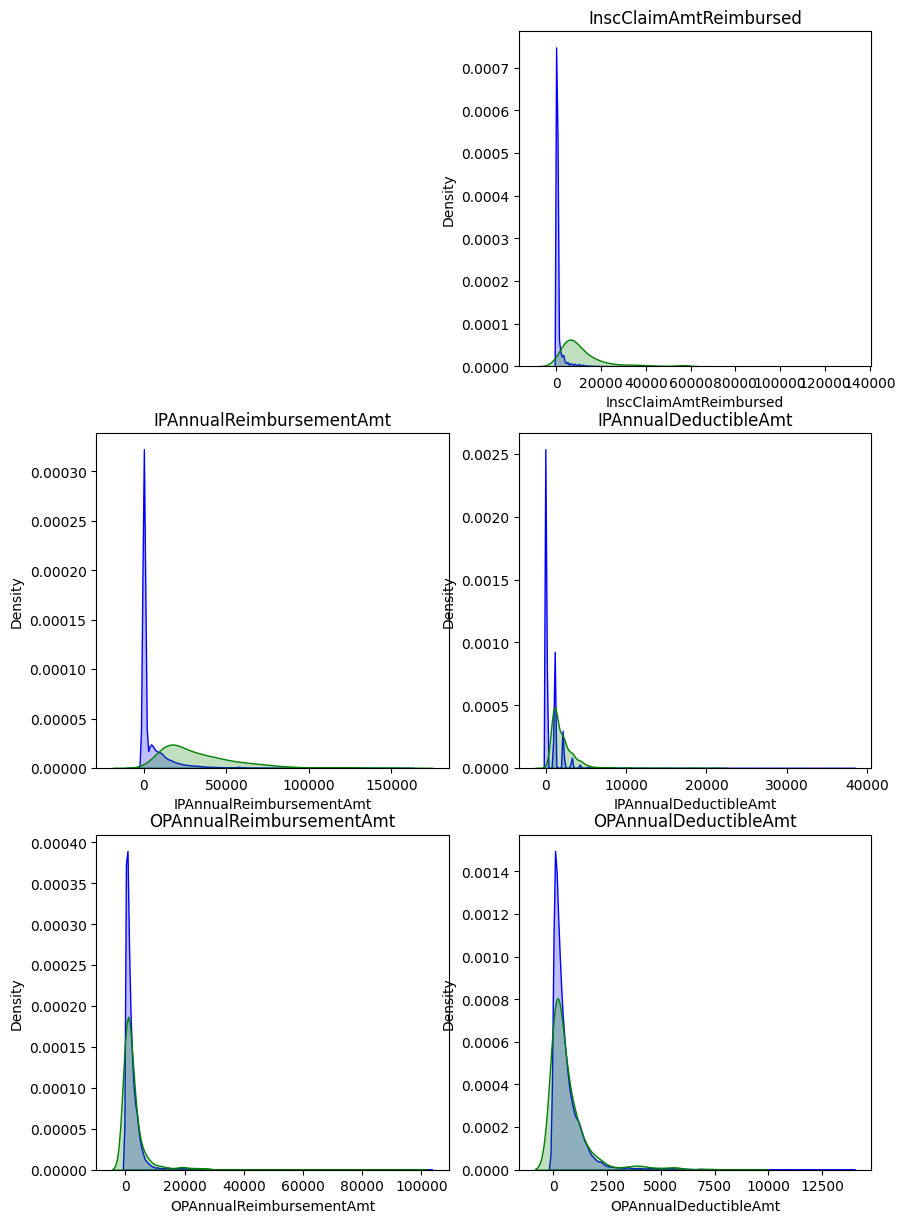

In [48]:
num_rows = (len(selected_col) + 3) // 2  # Adjust based on the desired layout
num_cols = 2

plt.figure(figsize=(10, 5*num_rows))
for idx, column in enumerate(selected_col, start=1):
    if column != 'DeductibleAmtPaid':
        plt.subplot(num_rows, num_cols, idx)
        sns.kdeplot(patient_train[patient_train["DeductibleAmtPaid_temp"]==1][column], fill=True, color="blue", label="like")
        sns.kdeplot(patient_train[patient_train["DeductibleAmtPaid_temp"]==0][column], fill=True, color="green", label="dislike")
        plt.title(column)

plt.show()

Observe that Missing values for DeductibleAmtPaid is associated with a righwards skew of InscClaimAmtReimbursed and IPAnnualReimbursementAmt -- meaning that missing values could be Missing Not At Random, where observations who don't pay are those with higher reimbursements (ie: they ran away with the money)

Hence, observe the distribution between missing vs non missing DeductibleAmtPaid against fradulent transactions

In [49]:
patient_train[patient_train['DeductibleAmtPaid'].isna()].groupby('PotentialFraud').count()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,is_inpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid_temp
PotentialFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,391,391,391,391,391,391,391,238,55,391,391,0,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,1,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391
Yes,508,508,508,508,508,508,508,306,43,508,508,0,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,5,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508


Observe that trend for missing DeductibleAmtPaid is the reverse of non missing DeductibleAmtPaid -- good chance that people actually ran away.

Hence, fair to impute the missing DeductibleAmtPaid values with -1.

In [50]:
# check that there are no zero values to begin with
len(patient_train[patient_train['DeductibleAmtPaid']==-1])

0

In [51]:
# drop temp column
patient_train.drop(['DeductibleAmtPaid_temp'], axis=1, inplace=True)

# replace missing with -1
patient_train['DeductibleAmtPaid'] = patient_train['DeductibleAmtPaid'].fillna(-1)

#### Missing OperatingPhysician --  check that all missing rows are associated with outpatient

Assumption: Patients who dont stay in the hospital do not require surgery, hence is Missing at Random

In [52]:
patient_train[patient_train['OperatingPhysician'].isna()]['is_inpatient'].unique()

array([1, 0])

Operating Physicians are present for both inpatient and outpatient. Maybe Operating Physicians can operate on outpatients too. Check distribution of missing vs non missing Operating Physicians on inpatient vs outpatients

<Axes: xlabel='OperatingPhysician_temp', ylabel='count'>

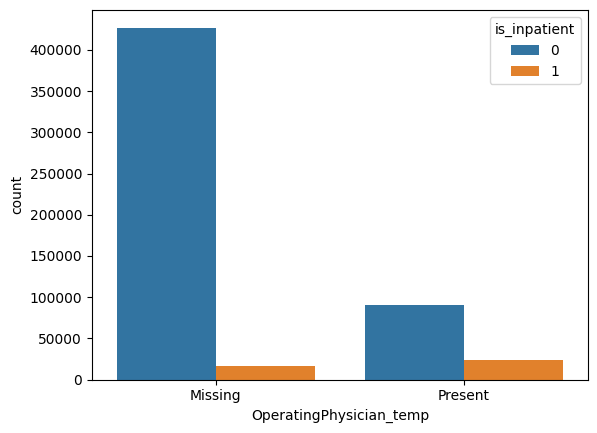

In [53]:
patient_train['OperatingPhysician_temp'] = patient_train['OperatingPhysician'].apply(lambda x: "Missing" if pd.isnull(x) else "Present")
sns.countplot(data=patient_train, x='OperatingPhysician_temp', hue='is_inpatient')

Turns out most of the missing operating physians are for outpatients, with similar trends to non missing observations. Hence, this seems to be Missing At Random, and can be imputted with placeholder "NA"

In [54]:
# drop temp column
patient_train.drop(['OperatingPhysician_temp'], axis=1, inplace=True)

# replace missing with -1
patient_train['OperatingPhysician'] = patient_train['OperatingPhysician'].fillna('NA')

#### Missing DOD (beneficiary) -- check that all of the missing rows have InscClaimAmtReimbursed payouts.

Assumption: dead beneficiaries do not get paid

In [55]:
patient_train[patient_train['DOD'].isna()]['InscClaimAmtReimbursed'].nunique()

437

Turns out both dead and living beneficiaries get paid. Hence DOD is likely to be missing completely at random, and hence can be imputed with a placeholder '1800-01-01' (somewhere in the very very distant past)

In [56]:
patient_train['DOD'] = patient_train['DOD'].fillna('1800-01-01')

In [57]:
# check for any more missing values
patient_train.isna().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                      0
OperatingPhysician                      0
OtherPhysician                     358475
AdmissionDt                             0
ClmAdmitDiagnosisCode                   0
DeductibleAmtPaid                       0
DischargeDt                             0
DiagnosisGroupCode                      0
ClmDiagnosisCode_1                      0
ClmDiagnosisCode_2                      0
ClmDiagnosisCode_3                      0
ClmDiagnosisCode_4                      0
ClmDiagnosisCode_5                      0
ClmDiagnosisCode_6                      0
ClmDiagnosisCode_7                      0
ClmDiagnosisCode_8                      0
ClmDiagnosisCode_9                      0
ClmDiagnosisCode_10               

## Duplicated Columns

In [58]:
# count number of row duplicates in train
duplicates = patient_train[patient_train.duplicated(keep=False)]
len(duplicates)


0

In [59]:
'''# check if theres any duplicated columms between train and test to prevent train-test contamination
temp_df = pd.merge(patient_train, patient_test, how='inner', on=['ClaimID'])
duplicates = temp_df.duplicated()

# Check if there are any common duplicates
if duplicates.any():
    print("Common duplicates found:")
    print(temp_df[duplicates])
else:
    print("No common duplicates found.")'''

'# check if theres any duplicated columms between train and test to prevent train-test contamination\ntemp_df = pd.merge(patient_train, patient_test, how=\'inner\', on=[\'ClaimID\'])\nduplicates = temp_df.duplicated()\n\n# Check if there are any common duplicates\nif duplicates.any():\n    print("Common duplicates found:")\n    print(temp_df[duplicates])\nelse:\n    print("No common duplicates found.")'

# Continuous Features Binning

All the datetime columns

In [60]:
date_cols = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt', 'DOB']

In [61]:
# add month and day of week to all DT columns
for col in date_cols:
    patient_train[col] = pd.to_datetime(patient_train[col], format = '%Y-%m-%d')
    patient_train[col] = pd.to_datetime(patient_train[col], format = '%Y-%m-%d')
    patient_train[col + "_year"] = patient_train[col].dt.year
    patient_train[col + "_dayOfWeek"] = patient_train[col].dt.day_of_week
    patient_train[col + "_month"] = patient_train[col].dt.month

In [62]:
patient_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,is_inpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,ClaimStartDt_year,ClaimStartDt_dayOfWeek,ClaimStartDt_month,ClaimEndDt_year,ClaimEndDt_dayOfWeek,ClaimEndDt_month,AdmissionDt_year,AdmissionDt_dayOfWeek,AdmissionDt_month,DischargeDt_year,DischargeDt_dayOfWeek,DischargeDt_month,DOB_year,DOB_dayOfWeek,DOB_month
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NA,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NA,0.0,0.0,0.0,0.0,0.0,1,1943-01-01,1800-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes,2009,6,4,2009,5,4,2009,6,4,2009,5,4,1943,4,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NA,NA,NA,NA,NA,NA,NA,7092.0,0.0,0.0,0.0,0.0,1,1943-01-01,1800-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No,2009,0,8,2009,2,9,2009,0,8,2009,2,9,1943,4,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NA,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NA,NA,NA,NA,0.0,0.0,0.0,0.0,0.0,1,1943-01-01,1800-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No,2009,3,9,2009,6,9,2009,3,9,2009,6,9,1943,4,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NA,331.0,0.0,0.0,0.0,0.0,1,1914-03-01,1800-01-01,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,No,2009,5,2,2009,6,2,2009,5,2,2009,6,2,1914,6,3
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NA,3893.0,0.0,0.0,0.0,0.0,1,1938-04-01,1800-01-01,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,No,2009,3,8,2009,6,8,2009,3,8,2009,6,8,1938,4,4


In [63]:
# get stay in time for inpatients
patient_train["admission_duration"]= (patient_train.DischargeDt - patient_train.AdmissionDt).dt.days
patient_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,is_inpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,ClaimStartDt_year,ClaimStartDt_dayOfWeek,ClaimStartDt_month,ClaimEndDt_year,ClaimEndDt_dayOfWeek,ClaimEndDt_month,AdmissionDt_year,AdmissionDt_dayOfWeek,AdmissionDt_month,DischargeDt_year,DischargeDt_dayOfWeek,DischargeDt_month,DOB_year,DOB_dayOfWeek,DOB_month,admission_duration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NA,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NA,0.0,0.0,0.0,0.0,0.0,1,1943-01-01,1800-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes,2009,6,4,2009,5,4,2009,6,4,2009,5,4,1943,4,1,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NA,NA,NA,NA,NA,NA,NA,7092.0,0.0,0.0,0.0,0.0,1,1943-01-01,1800-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No,2009,0,8,2009,2,9,2009,0,8,2009,2,9,1943,4,1,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NA,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NA,NA,NA,NA,0.0,0.0,0.0,0.0,0.0,1,1943-01-01,1800-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No,2009,3,9,2009,6,9,2009,3,9,2009,6,9,1943,4,1,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NA,331.0,0.0,0.0,0.0,0.0,1,1914-03-01,1800-01-01,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,No,2009,5,2,2009,6,2,2009,5,2,2009,6,2,1914,6,3,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NA,3893.0,0.0,0.0,0.0,0.0,1,1938-04-01,1800-01-01,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,No,2009,3,8,2009,6,8,2009,3,8,2009,6,8,1938,4,4,17


# Exploratory Data Analysis

In [64]:
patient_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 71 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               558211 non-null  object        
 7   OperatingPhysician               558211 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   AdmissionDt                      558211 non-null  datetime64[ns]
 10  ClmAdmitDiagnosisCode            558211 non-

In [65]:
num_col = patient_train.select_dtypes(include=['number'])
cat_col = patient_train.select_dtypes(include=['object'])
print(num_col.columns)
print(cat_col.columns)

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'is_inpatient', 'Gender', 'Race', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimStartDt_year', 'ClaimStartDt_dayOfWeek',
       'ClaimStartDt_month', 'ClaimEndDt_year', 'ClaimEndDt_dayOfWeek',
       'ClaimEndDt_month', 'AdmissionDt_year', 'AdmissionDt_dayOfWeek',
       'AdmissionDt_month', 'DischargeDt_year', 'DischargeDt_dayO

#### Distribution of Numerical Columns

In [66]:
num_cols_discrete = ['State',
       'County', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt']

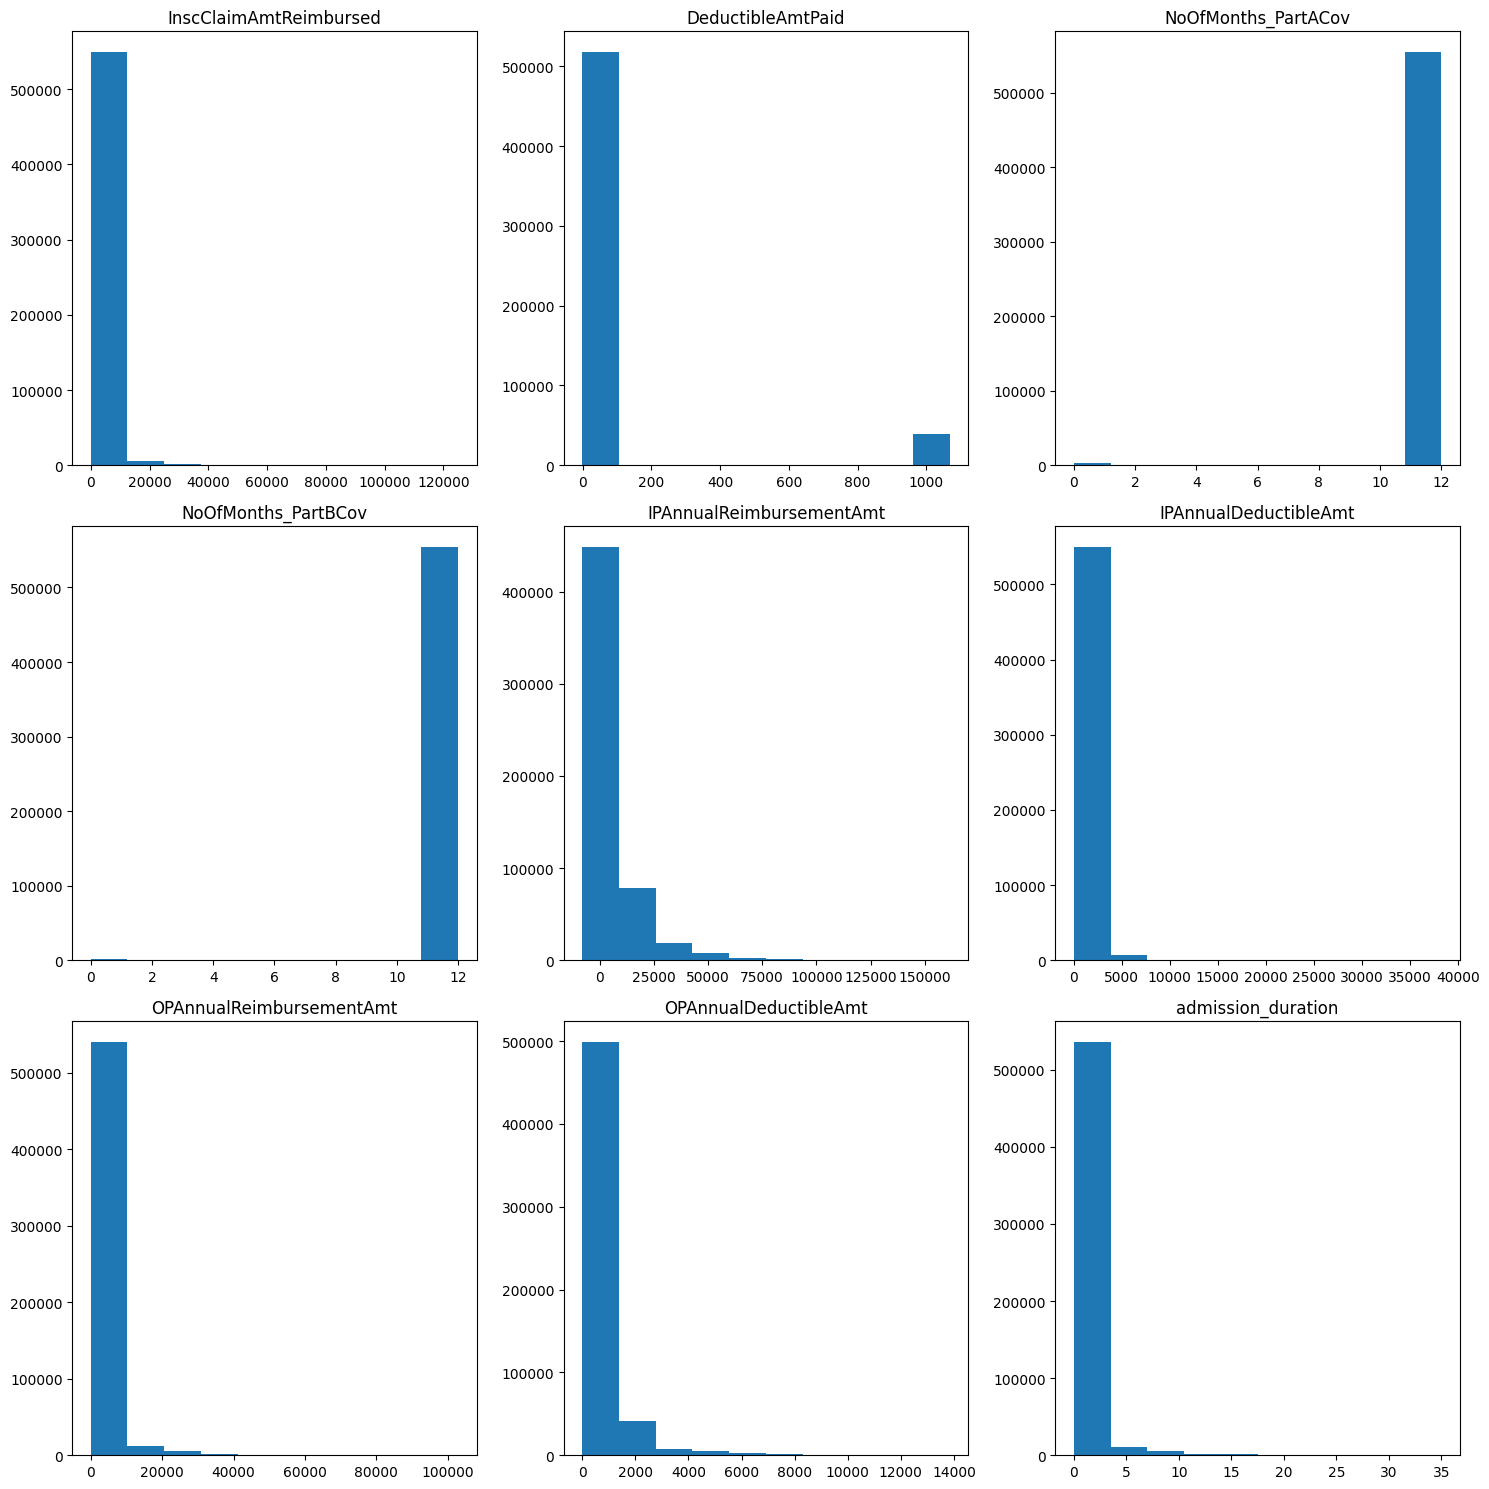

In [67]:
num_cols_cont = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'admission_duration']

num_rows = (len(num_cols_discrete) + 3) // 3  # Adjust based on the desired layout
num_cols = 3  # You can change this based on your layout preference

plt.figure(figsize=(15, 5*num_rows))
for idx, column in enumerate(num_cols_cont, start=1):
    plt.subplot(num_rows, num_cols, idx)
    plt.hist(patient_train[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Numerical vs Numerical -- Correlation Plots

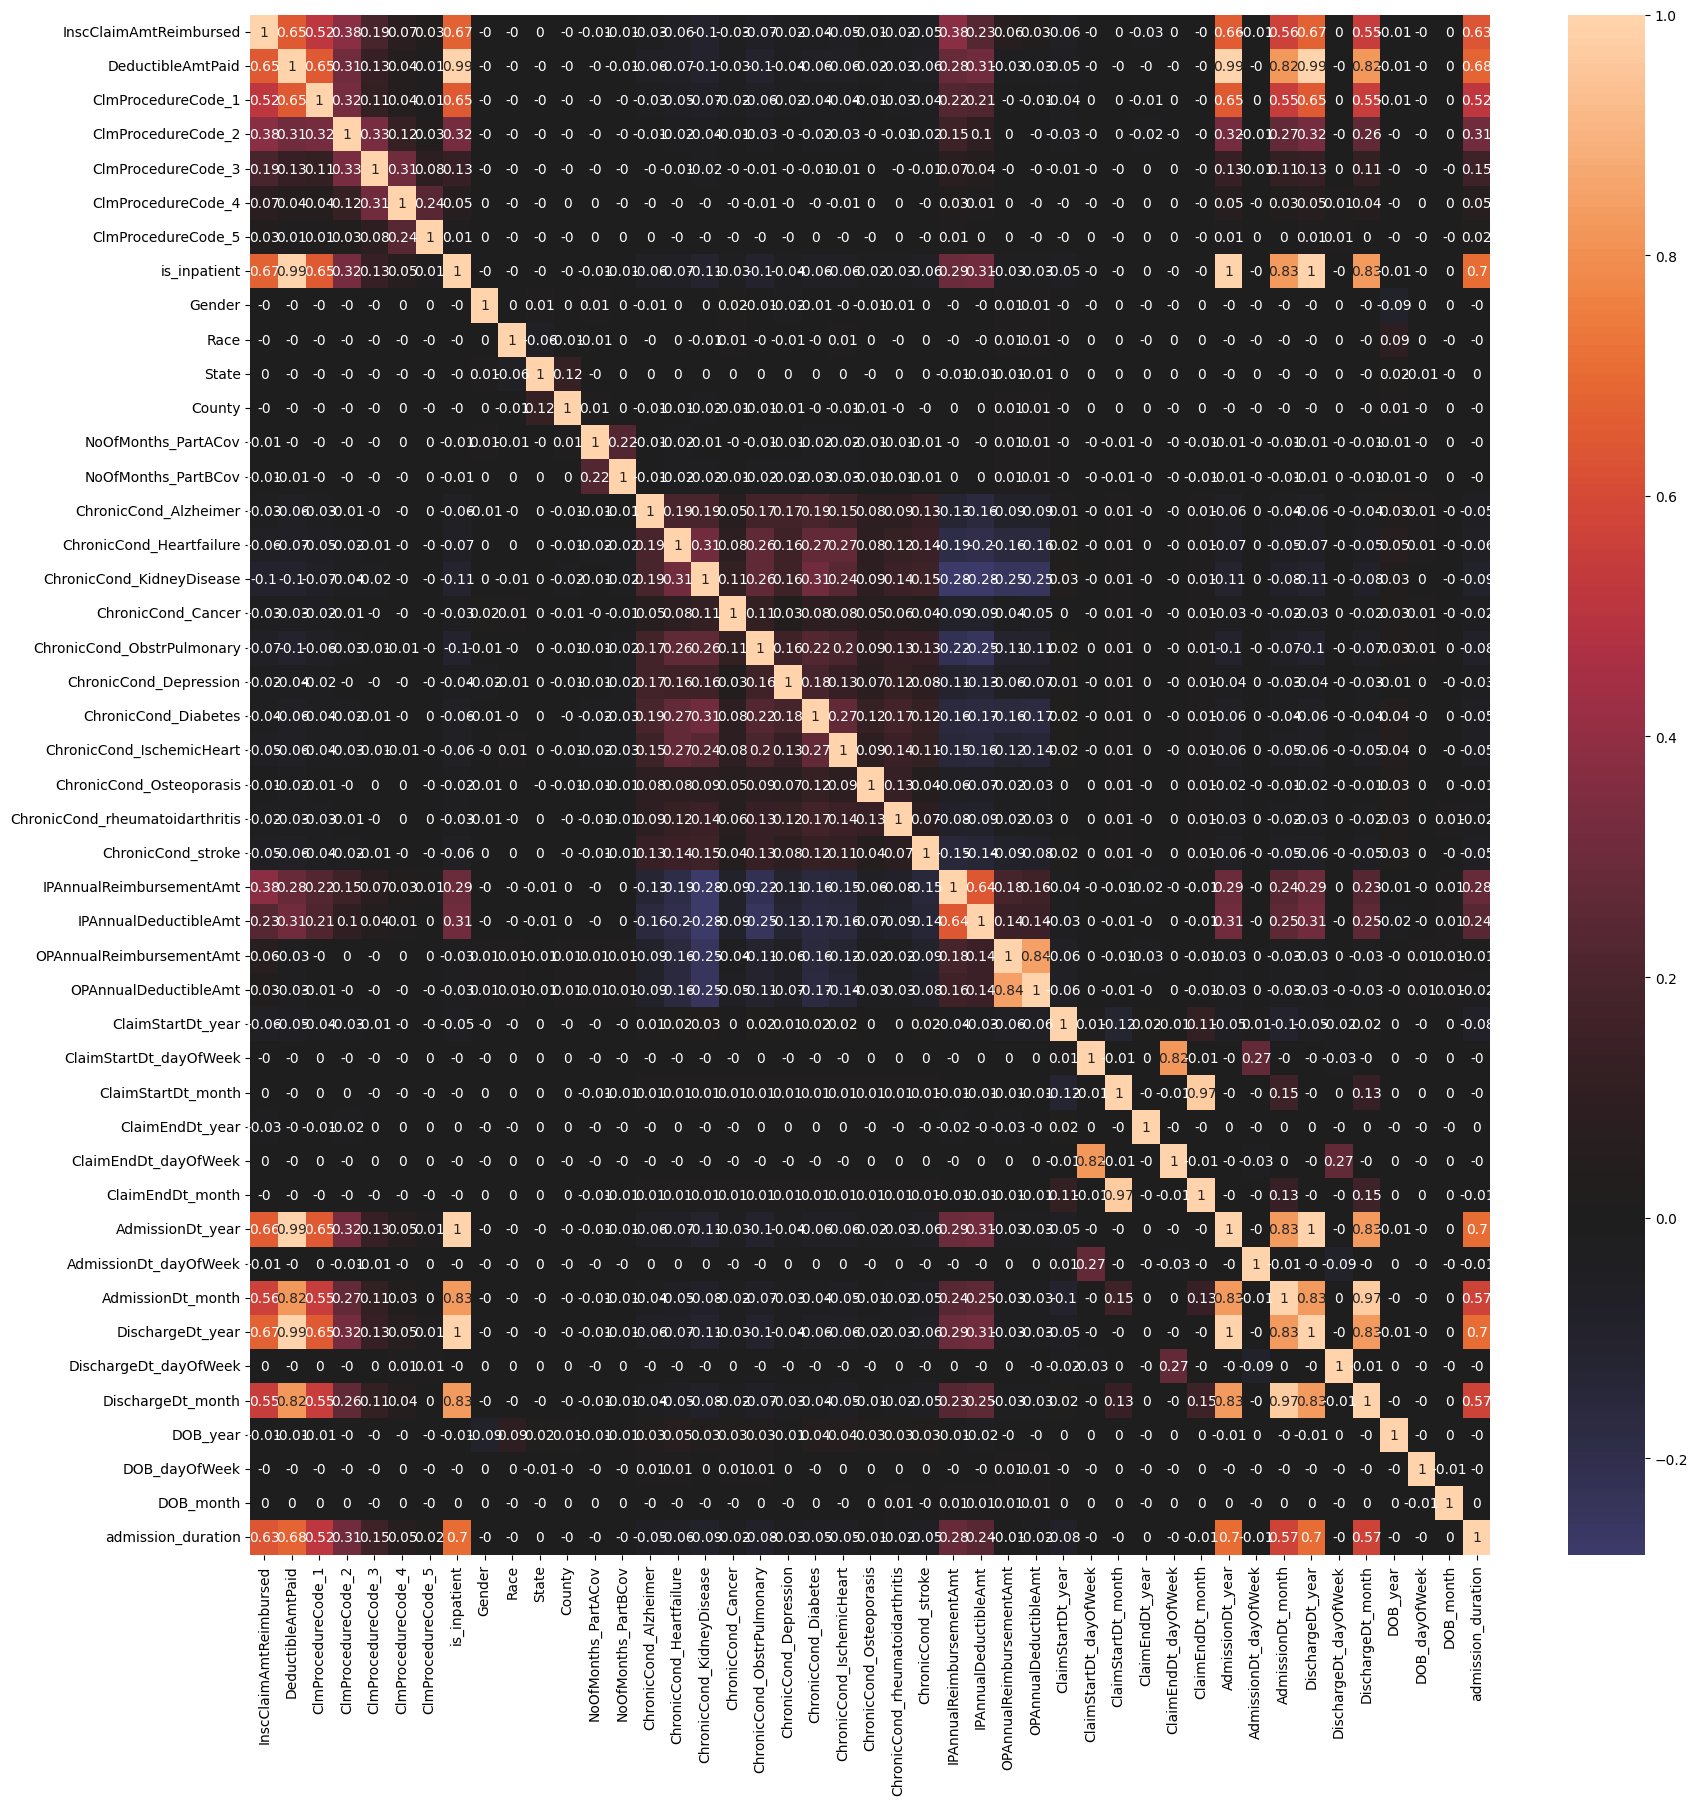

In [68]:
# Compute the correlation matrix for numerical columns
corrmat =  num_col.corr()

# Set the size of the heatmap figure
plt.figure(figsize=(20, 20))

# Round the correlation values to 2 decimal places
rounded_corrmat = corrmat.round(2)

# Create a heatmap of the rounded correlation matrix
sns.heatmap(rounded_corrmat, annot=True, center=0)

# Display the heatmap
plt.show()

### Categorical vs Categorical -- Bar Graphs

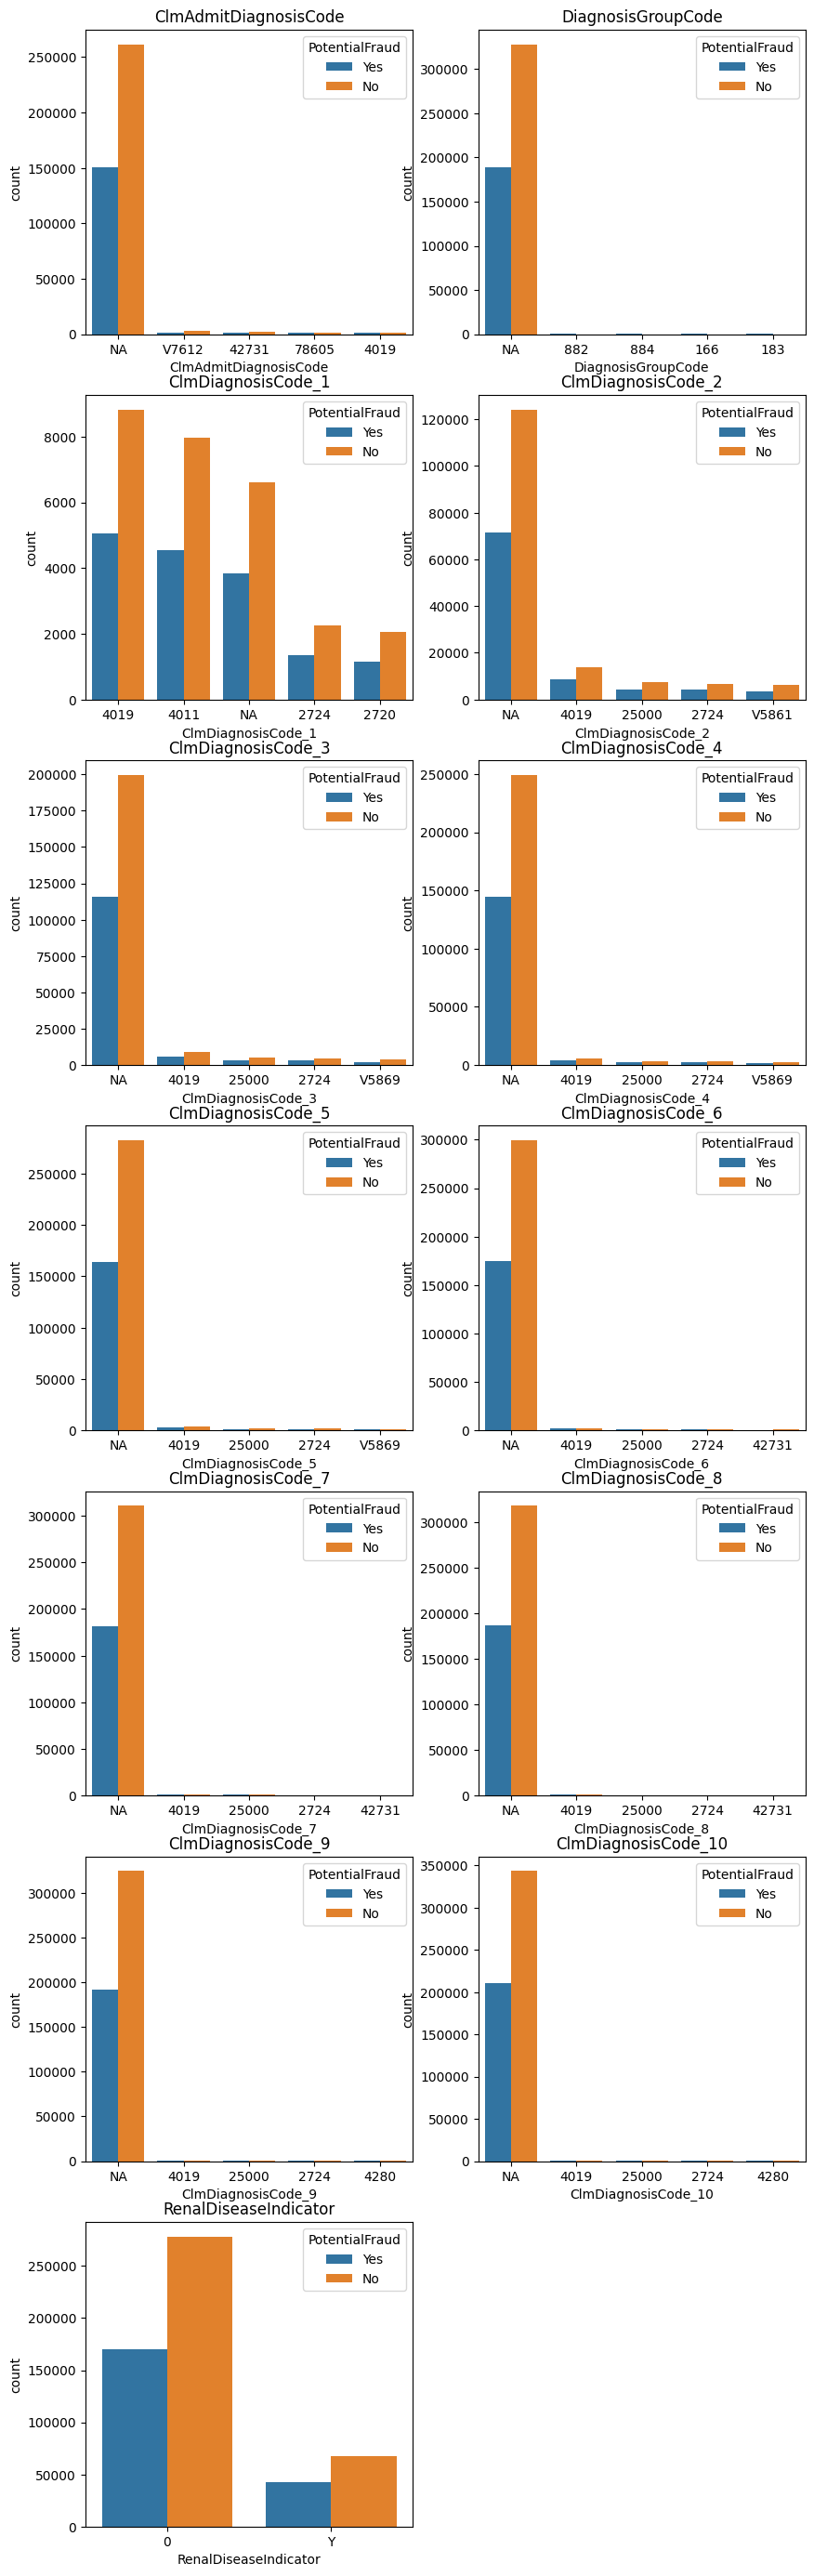

In [69]:
cat_col = ['ClmAdmitDiagnosisCode',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'RenalDiseaseIndicator']

num_rows = (len(cat_col) + 3) // 2  # Adjust based on the desired layout
num_cols = 2

plt.figure(figsize=(10, 5*num_rows))
for idx, column in enumerate(cat_col, start=1):
    plt.subplot(num_rows, num_cols, idx)
    sns.countplot(data=patient_train, x=column, hue='PotentialFraud', order=patient_train[column].value_counts().iloc[:5].index)
    plt.title(column)

plt.show()

# Feature Engineering

Check the number of unique values in each of the codes to get an estimate of feature value dimensionality

In [70]:
codes = ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
         'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
         'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
         'ClmProcedureCode_5']

for code in codes:
    print(f'number of unique values in {code}: {patient_train[code].nunique()}')

number of unique values in ClmAdmitDiagnosisCode: 4099
number of unique values in ClmDiagnosisCode_1: 10451
number of unique values in ClmDiagnosisCode_2: 5301
number of unique values in ClmDiagnosisCode_3: 4757
number of unique values in ClmDiagnosisCode_4: 4360
number of unique values in ClmDiagnosisCode_5: 3971
number of unique values in ClmDiagnosisCode_6: 3608
number of unique values in ClmDiagnosisCode_7: 3389
number of unique values in ClmDiagnosisCode_8: 3071
number of unique values in ClmDiagnosisCode_9: 2775
number of unique values in ClmDiagnosisCode_10: 1159
number of unique values in ClmProcedureCode_1: 1118
number of unique values in ClmProcedureCode_2: 301
number of unique values in ClmProcedureCode_3: 155
number of unique values in ClmProcedureCode_4: 49
number of unique values in ClmProcedureCode_5: 7


Almost all the codes have high feature value dimensionality. One Hot Encoding would result in a very high dimensional dataframe, hence use (non-ordinal) frequency encoding instead.

Replace all codes with frequency encoding

In [71]:
import category_encoders as ce

for code in codes:
    encoder = ce.CountEncoder(cols=code)
    patient_train[code + "_frequency_encoded"] = encoder.fit_transform(patient_train[code])

### Data Transformation

#### Distribution of Categorical Columns

This is done after encoding further down

In [72]:
cat_col = ['ClmAdmitDiagnosisCode',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'RenalDiseaseIndicator']

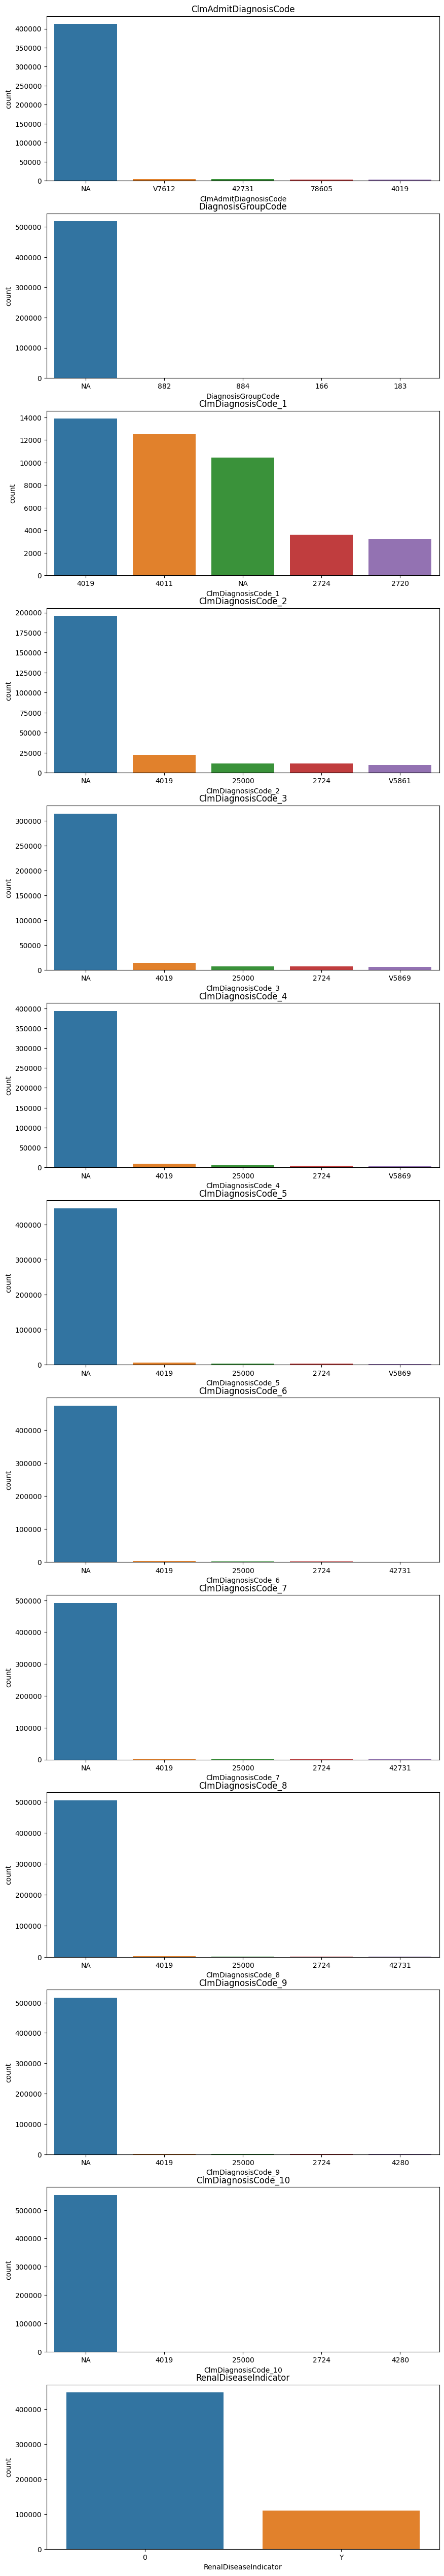

In [73]:
num_rows = (len(cat_col) + 3) // 1 
num_cols = 1

plt.figure(figsize=(10, 5*num_rows))
for idx, column in enumerate(cat_col, start=1):
    plt.subplot(num_rows, num_cols, idx)
    sns.countplot(data=patient_train, x=column, order=patient_train[column].value_counts().iloc[:5].index)
    plt.title(column)

plt.show()

check distribution of numerical columns to determine type of transformation needed (refer to EDA portion above)

In [74]:
num_cols_log = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'admission_duration']

In [75]:
X_train_log_transformed = patient_train.copy()

for col in num_cols_log:
    # replace the 0 with some very small number close to 0 (because log0 is a math error)
    X_train_log_transformed[col] = X_train_log_transformed[col].replace(0, 0.00000000000001)
    X_train_log_transformed[col + '_log'] = np.log(X_train_log_transformed[col])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Binary Encoding

Replace PotentialFraud with binary variable

In [76]:
patient_train['PotentialFraud'] = patient_train['PotentialFraud'].apply(lambda x: 1 if x == 'Yes' else 0)

### Data Scaling for Numerical Columns

In [77]:
features_to_scale = patient_train.select_dtypes(include=['number']).columns

Standard Scaler -- For algorithms that assumes a normal distribution

In [78]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

# fit and transform the scaler
X_train_standard_scaled = patient_train.copy()
X_train_standard_scaled[features_to_scale] = standardScaler.fit_transform(X_train_standard_scaled[features_to_scale])

'''# transform the testing set to the same scale as the training set
X_test_scaled = patient_test.copy()
X_test_scaled[features_to_scale] = scaler.transform(X_test_scaled[features_to_scale])'''

'# transform the testing set to the same scale as the training set\nX_test_scaled = patient_test.copy()\nX_test_scaled[features_to_scale] = scaler.transform(X_test_scaled[features_to_scale])'

MinMax Scaler -- For algorithms that rely on distance to perform classifications

In [79]:
from sklearn.preprocessing import MinMaxScaler

minmaxScaler = MinMaxScaler()

# fit and transform the scaler
X_train_minmax_scaled = patient_train.copy()
X_train_minmax_scaled[features_to_scale] = minmaxScaler.fit_transform(X_train_minmax_scaled[features_to_scale])

### Final Feature and Target Columns

In [80]:
patient_train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'is_inpatient', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diab

In [81]:
feature_cols = ['ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'DeductibleAmtPaid', 
       'is_inpatient', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt',  'ClaimStartDt_year',
       'ClaimStartDt_dayOfWeek', 'ClaimStartDt_month', 'ClaimEndDt_year',
       'ClaimEndDt_dayOfWeek', 'ClaimEndDt_month', 'AdmissionDt_year',
       'AdmissionDt_dayOfWeek', 'AdmissionDt_month', 'DischargeDt_year',
       'DischargeDt_dayOfWeek', 'DischargeDt_month', 'DOB_year',
       'DOB_dayOfWeek', 'DOB_month', 'admission_duration',
       'ClmAdmitDiagnosisCode_frequency_encoded',
       'ClmDiagnosisCode_1_frequency_encoded',
       'ClmDiagnosisCode_2_frequency_encoded',
       'ClmDiagnosisCode_3_frequency_encoded',
       'ClmDiagnosisCode_4_frequency_encoded',
       'ClmDiagnosisCode_5_frequency_encoded',
       'ClmDiagnosisCode_6_frequency_encoded',
       'ClmDiagnosisCode_7_frequency_encoded',
       'ClmDiagnosisCode_8_frequency_encoded',
       'ClmDiagnosisCode_9_frequency_encoded',
       'ClmDiagnosisCode_10_frequency_encoded',
       'ClmProcedureCode_1_frequency_encoded',
       'ClmProcedureCode_2_frequency_encoded',
       'ClmProcedureCode_3_frequency_encoded',
       'ClmProcedureCode_4_frequency_encoded',
       'ClmProcedureCode_5_frequency_encoded']
target_col = ['PotentialFraud']
X_train = patient_train[feature_cols].copy()
y_train = patient_train[target_col].copy()

# X_test  = test_dataset[feature_cols].copy()
# y_test  = test_dataset[target_col].copy()

In [82]:
X_train.head()

,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,is_inpatient,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimStartDt_year,ClaimStartDt_dayOfWeek,ClaimStartDt_month,ClaimEndDt_year,ClaimEndDt_dayOfWeek,ClaimEndDt_month,AdmissionDt_year,AdmissionDt_dayOfWeek,AdmissionDt_month,DischargeDt_year,DischargeDt_dayOfWeek,DischargeDt_month,DOB_year,DOB_dayOfWeek,DOB_month,admission_duration,ClmAdmitDiagnosisCode_frequency_encoded,ClmDiagnosisCode_1_frequency_encoded,ClmDiagnosisCode_2_frequency_encoded,ClmDiagnosisCode_3_frequency_encoded,ClmDiagnosisCode_4_frequency_encoded,ClmDiagnosisCode_5_frequency_encoded,ClmDiagnosisCode_6_frequency_encoded,ClmDiagnosisCode_7_frequency_encoded,ClmDiagnosisCode_8_frequency_encoded,ClmDiagnosisCode_9_frequency_encoded,ClmDiagnosisCode_10_frequency_encoded,ClmProcedureCode_1_frequency_encoded,ClmProcedureCode_2_frequency_encoded,ClmProcedureCode_3_frequency_encoded,ClmProcedureCode_4_frequency_encoded,ClmProcedureCode_5_frequency_encoded
0,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NA,NaN,1068.0,1,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,2009,6,4,2009,5,4,2009,6,4,2009,5,4,1943,4,1,6,252,66,22378,595,76,459,535,1536,19,327,553201,534901,552721,557242,558093,558202
1,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,1068.0,1,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,2009,0,8,2009,2,9,2009,0,8,2009,2,9,1943,4,1,2,4,21,1246,621,393675,446287,473819,492034,504767,516396,553201,14,552721,557242,558093,558202
2,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NA,PHY324689,1068.0,1,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,2009,3,9,2009,6,9,2009,3,9,2009,6,9,1943,4,1,3,140,128,132,714,289,85,184,492034,504767,516396,553201,534901,552721,557242,558093,558202
3,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,1068.0,1,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,2009,5,2,2009,6,2,2009,5,2,2009,6,2,1914,6,3,8,90,696,175,103,254,19,277,20,389,1581,553201,100,552721,557242,558093,558202
4,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,1068.0,1,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,2009,3,8,2009,6,8,2009,3,8,2009,6,8,1938,4,4,17,165,90,2685,52,576,114,339,190,28,20,553201,854,552721,557242,558093,558202


### Dimensionality Reduction -- Principal Component Analysis

KIV: can include gridsearch/ kfold validation here to determine best number of PCA

In [83]:
from sklearn.decomposition import PCA

# Perform PCA with 3 components on the standard scaled dataset
pca = PCA(n_components=10, random_state=0)
pca.fit(X_train_standard_scaled[features_to_scale])

# Create a DataFrame to store the PCA results
PCA_ds = pd.DataFrame(pca.transform(X_train_standard_scaled[features_to_scale]), 
                      columns=["col1", "col2", "col3","col4","col5",'col6','col7','col8','col9','col10'])

# Display summary statistics of the PCA results
PCA_summary = PCA_ds.describe().T
print(PCA_summary)

          count          mean       std        min       25%       50%  \
col1   558211.0 -2.093654e-16  3.392344  -2.051888 -1.470852 -1.128628   
col2   558211.0 -5.514171e-17  1.790735 -11.164290 -0.953059  0.071641   
col3   558211.0  1.127274e-16  1.727844  -4.943692 -0.849390 -0.103498   
col4   558211.0  1.574823e-16  1.578931  -9.973034 -0.868616 -0.350046   
col5   558211.0 -2.884375e-17  1.432079  -4.621202 -1.189002 -0.002416   
col6   558211.0 -1.428186e-17  1.379378 -29.479154 -0.416042  0.008363   
col7   558211.0 -6.631771e-17  1.369840 -11.306860 -1.113326 -0.007524   
col8   558211.0 -4.307469e-17  1.264622 -19.217249 -0.697956 -0.090350   
col9   558211.0  3.102676e-17  1.154851 -86.398762 -0.318871 -0.005155   
col10  558211.0  1.476556e-16  1.112131 -15.861822 -0.669786  0.044161   

            75%         max  
col1  -0.468633   32.108185  
col2   1.043817  130.065592  
col3   0.694029  204.038773  
col4   0.624700  168.568622  
col5   1.193523   28.972971  
col6 

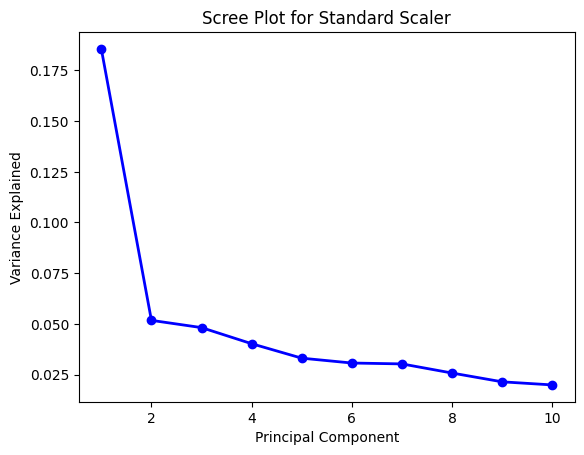

In [84]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot for Standard Scaler')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Ideal PC = 2 for standard scaler

In [85]:
# Perform PCA with 3 components on the minmax scaled dataset
pca_minmax = PCA(n_components=10, random_state=0)
pca_minmax.fit(X_train_minmax_scaled[features_to_scale])

# Create a DataFrame to store the PCA results
PCA_ds = pd.DataFrame(pca_minmax.transform(X_train_minmax_scaled[features_to_scale]), 
                      columns=["col1", "col2", "col3","col4","col5",'col6','col7','col8','col9','col10'])

# Display summary statistics of the PCA results
PCA_summary = PCA_ds.describe().T
print(PCA_summary)

          count          mean       std       min       25%       50%  \
col1   558211.0  9.602703e-17  0.982246 -1.166688 -0.656884 -0.334127   
col2   558211.0  2.998935e-17  0.720092 -1.843221 -0.540933 -0.004184   
col3   558211.0  3.859411e-17  0.565345 -1.082346 -0.508599  0.014720   
col4   558211.0  8.197429e-18  0.495486 -0.825141 -0.426138 -0.276463   
col5   558211.0  5.658645e-17  0.481292 -0.901176 -0.388189 -0.249335   
col6   558211.0  3.538642e-17  0.471759 -1.271297 -0.324831 -0.014422   
col7   558211.0  1.108053e-17  0.468431 -1.161452 -0.350478  0.009795   
col8   558211.0 -1.011727e-16  0.450833 -1.238270 -0.329844 -0.001234   
col9   558211.0 -6.080609e-17  0.448839 -1.224383 -0.283271 -0.025073   
col10  558211.0  1.199065e-16  0.446988 -1.405103 -0.320643 -0.004521   

            75%       max  
col1   0.306624  3.442997  
col2   0.539984  2.214312  
col3   0.402648  2.274491  
col4   0.541849  0.888615  
col5   0.550583  0.929428  
col6   0.324322  1.697916  


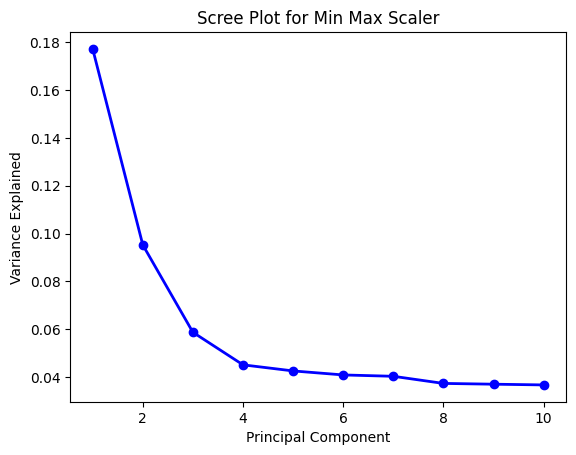

In [86]:
PC_values = np.arange(pca_minmax.n_components_) + 1
plt.plot(PC_values, pca_minmax.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot for Min Max Scaler')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Ideal PC = 4